<a href="https://colab.research.google.com/github/savyasachi1234/Lung-Cancer-Detection-Using-VGG16/blob/main/Copy_of_Lung_Cancer_Detection_Using_CNN2_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.applications import vgg16
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATADIR = '/content/drive/MyDrive/datasets/Lung_Cancer/lung_colon_image_set/lung_image_sets'
CATEGORIES = ['lung_aca', 'lung_n', 'lung_scc']

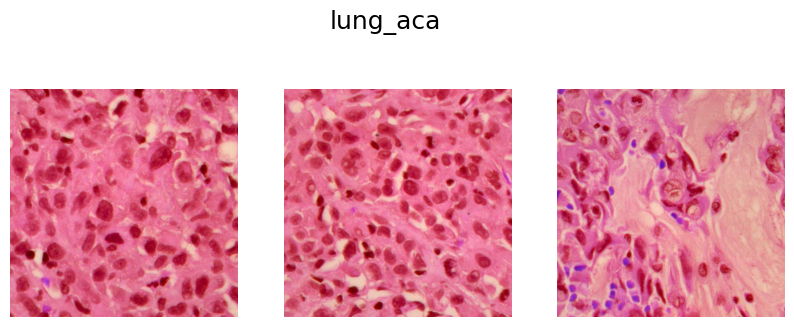

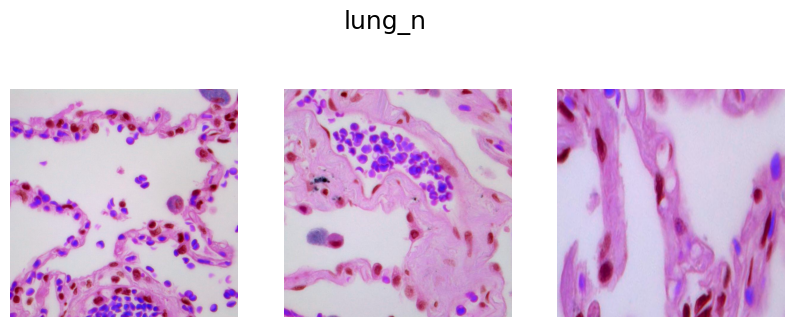

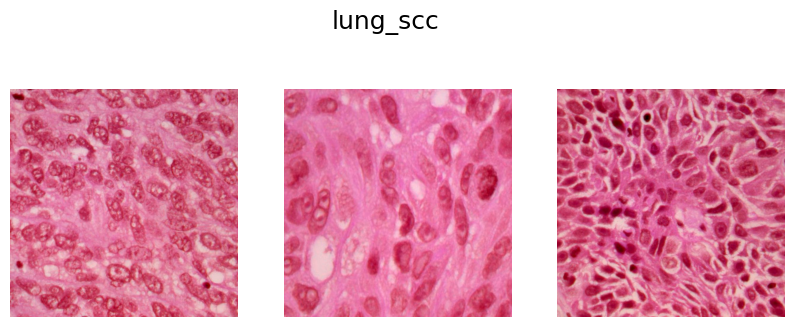

In [4]:
# Displaying the images
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    images = os.listdir(path)

    # Initialize a subplot with 1 row and 3 columns
    fig, ax = plt.subplots(1, 3, figsize=(10, 4))
    fig.suptitle(f'{category}', fontsize=18)

    for i in range(3):
        # Randomly select an image
        img_name = images[np.random.randint(0, len(images))]
        img_path = os.path.join(path, img_name)
        img_array = cv2.imread(img_path)

        # Display the image
        ax[i].imshow(img_array)
        ax[i].axis('off')


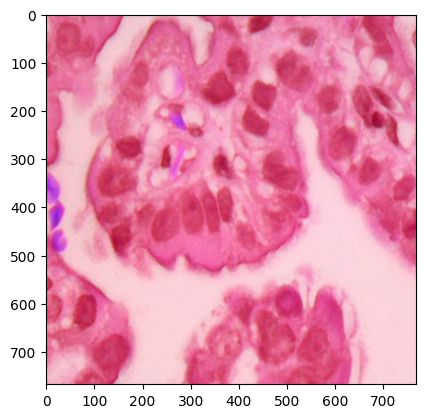

In [5]:
for category in CATEGORIES:
  path = os.path.join(DATADIR, category)      #path to cats or dogs directory
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    plt.imshow(img_array)
    plt.show()
    break
  break

In [6]:
img_array.shape

(768, 768, 3)

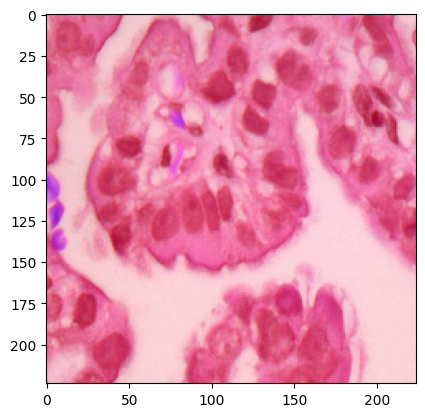

In [7]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)

In [8]:
new_array.shape

(224, 224, 3)

In [10]:
# creating training data

training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

create_training_data()

In [11]:
len(training_data)

15000

In [12]:
X = []
y = []

for features, label in training_data:
  X.append(features)
  y.append(label)

In [13]:
# Converting the data type of X and y from list to numpy array
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)    # last value '3' for 'RGB'
y = np.array(y)

In [14]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = 0.2,
                                                  random_state = 42)

In [15]:
print(f'X_train Length : {X_train.shape[0]}, X_train Image size : {X_train.shape[1:3]}, Channel Dimension : {X_train.shape[3]}')
print(f'X_test Length : {X_test.shape[0]}, X_test Image size : {X_test.shape[1:3]}, Channel Dimension : {X_test.shape[3]}')

X_train Length : 12000, X_train Image size : (224, 224), Channel Dimension : 3
X_test Length : 3000, X_test Image size : (224, 224), Channel Dimension : 3


In [16]:
# vgg model
vgg = vgg16.VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (IMG_SIZE, IMG_SIZE, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
# freezing the bottom (conv) layers
for layer in vgg.layers:
  layer.trainable = False

In [18]:
# building the top (FC) layers
model = keras.Sequential([
    vgg,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(3, activation = 'softmax'),
])

In [19]:
#compilation
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 75s 157ms/step - accuracy: 0.8836 - loss: 0.8386
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 74s 174ms/step - accuracy: 0.9722 - loss: 0.0737
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 175ms/step - accuracy: 0.9849 - loss: 0.0445
Epoch 4/5
355/375 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.9881 - loss: 0.0320

In [21]:
# evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy : {accuracy * 100}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 30s 302ms/step - accuracy: 0.9777 - loss: 0.0527
Model Accuracy : 98.1000006198883


In [22]:
# first 5 true labels
y_test[:5]

array([2, 1, 2, 0, 1])

In [23]:
pred = np.argmax(model.predict(X_test), axis = -1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 179ms/step


In [24]:
# first 5 predicted labels
pred[:5]

array([2, 1, 2, 2, 1])

In [25]:
# classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1037
           1       1.00      1.00      1.00       970
           2       0.97      0.97      0.97       993

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



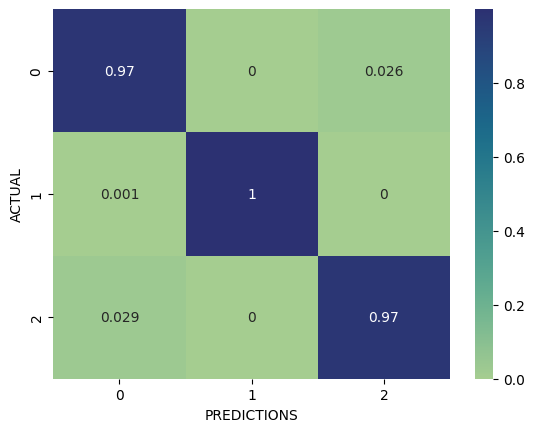

In [26]:
#confusion matrix
cf = confusion_matrix(y_test, pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'crest');
plt.xlabel('PREDICTIONS');
plt.ylabel('ACTUAL');

- 0 - lung_adenocarcinomas - Correct classification with 96% accuracy
- 1 - lung_normal - Correct classification with 100% accuracy
- 2 - lung_squamous_cell_carcinomas - Correct classification with 99% accuracy

In [27]:
model.save("lung_cancer_model.h5")


In [28]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("lung_cancer_model.h5")

# Verify model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,766,341 (60.14 MB)

 Trainable params: 1,051,651 (4.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)